In [ ]:

import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/Estocasticos/

/content/gdrive/My Drive/Estocasticos


In [ ]:
!ls /content/gdrive/My\ Drive/Estocasticos/*

In [ ]:
# -----------------------------------------------------  Eigenfaces versus Fisherfaces on the Faces94 Database with Scikit-Learn  --------#
#---------- https://nicholastsmith.wordpress.com/2016/02/18/eigenfaces-versus-fisherfaces-on-the-faces94-database-with-scikit-learn/ ----#
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from random import randint
import matplotlib.cm as cm
from skimage import io, color
import os
import cv2

path_redicortadas='Dataset_Cortadas_Redimensionadas' #4

# %% Leer las imagenes

#Cantidad de imagenes por sujetos
numImg = 3
#Numero de sujetos (Perros)
numSbj = 20
#Matriz de ceros con dimensiones (240, 36000)
A = np.zeros([numImg * numSbj, 180 * 180])
#Matriz de ceros con dimensiones (240,)
y = np.zeros([numImg * numSbj])

#Path de la carpeta de imagenes
#fPath = path_redicortadas
fPath = 'Dataset_Clases_R'

#Se le asigna el numero de sujetos a recorrer
j = numSbj

#Iterador del total de las imagenes (numImg * numSbj)
c = 0

#For que recorre las carpetas(sujetos) del path
for i in os.listdir(fPath):
    if(j <= 0):
        break
    j -= 1
    
    #For que recorre la imagen de cada carpeta(sujeto)
    for f in os.listdir(fPath + '/' + i):

      #i Carpeta del sujeto 
      #f Nombre de la imagen del sujeto
      #Ruta de la imagen
      imgPath = fPath + '/' + i + '/' + f
      print(imgPath)
      print(i)
      print(f)
      #A[Y,X]
      #Se lee por cada c(fila de la matriz), todas las columnas de la misma
      A[c, :] = color.rgb2gray(io.imread(imgPath)).reshape([1, 180 * 180])
      #Se crea un arreglo con la cantida de imagenes que hay por sujeto. Identificandp a cada sujeto(j)
      y[c] = j
      c = c + 1


Dataset_Clases_R/Perro3/Perro3.2.jpg
Perro3
Perro3.2.jpg
Dataset_Clases_R/Perro3/Perro3.3.jpg
Perro3
Perro3.3.jpg
Dataset_Clases_R/Perro3/Perro3.1.jpg
Perro3
Perro3.1.jpg
Dataset_Clases_R/Perro5/Perro5.3.jpg
Perro5
Perro5.3.jpg
Dataset_Clases_R/Perro5/Perro5.2.jpg
Perro5
Perro5.2.jpg
Dataset_Clases_R/Perro5/Perro5.1.jpg
Perro5
Perro5.1.jpg
Dataset_Clases_R/Perro10/Perro10.2.jpg
Perro10
Perro10.2.jpg
Dataset_Clases_R/Perro10/Perro10.3.jpg
Perro10
Perro10.3.jpg
Dataset_Clases_R/Perro10/Perro10.1.jpg
Perro10
Perro10.1.jpg
Dataset_Clases_R/Perro8/Perro8.2.jpg
Perro8
Perro8.2.jpg
Dataset_Clases_R/Perro8/Perro8.1.jpg
Perro8
Perro8.1.jpg
Dataset_Clases_R/Perro8/Perro8.3.jpg
Perro8
Perro8.3.jpg
Dataset_Clases_R/Perro2/Perro2.2.jpg
Perro2
Perro2.2.jpg
Dataset_Clases_R/Perro2/Perro2.3.jpg
Perro2
Perro2.3.jpg
Dataset_Clases_R/Perro2/Perro2.1.jpg
Perro2
Perro2.1.jpg
Dataset_Clases_R/Perro9/Perro9.3.jpg
Perro9
Perro9.3.jpg
Dataset_Clases_R/Perro9/Perro9.2.jpg
Perro9
Perro9.2.jpg
Dataset_Clases_R/Pe

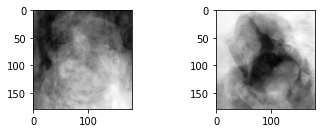

In [ ]:
plt.figure()
pca = PCA(n_components=3)
pca.fit(A)
for i in range(2):
    ax = plt.subplot(2, 2, i + 1)
    ax.imshow(pca.components_[i].reshape([180, 180]),cmap='Greys')
plt.show()

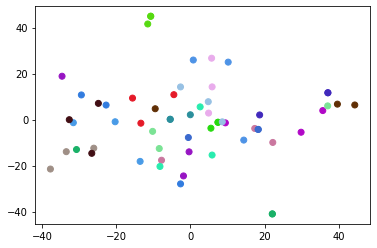

In [ ]:
#Colors for distinct individuals
cols = ['#{:06x}'.format(randint(0, 0xffffff)) for i in range(numSbj)]
pltCol = [cols[int(k)] for k in y]
# %% Plot 2d PCA data
drA = pca.transform(A)
plt.figure()
plt.scatter(drA[:, 0], drA[:, 1], color=pltCol)
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
#---Fisherfaces Based Classification

# %%Compute Fisherfaces
lda = LinearDiscriminantAnalysis()
#kf = KFold(n_splits=2)
kf = KFold(n_splits=4, random_state=1, shuffle=True)
kf.get_n_splits(A)

print(kf)

for train_index, test_index in kf.split(A):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = A[train_index], A[test_index]
  y_train, y_test = y[train_index], y[test_index]
  #Use PCA to transform from dimension F to dimension N-m
  pca = PCA(n_components=(len(train_index) - numSbj))
  pca.fit(A[train_index])
  #Compute LDA of reduced data
  lda.fit(pca.transform(A[train_index]), y[train_index])
  yHat = lda.predict(pca.transform(A[test_index]))
  #Compute classification error
  outVal = accuracy_score(y_test, yHat)
  print('Score: ' + str(outVal*100))

KFold(n_splits=4, random_state=1, shuffle=True)
Score: 33.33333333333333
Score: 6.666666666666667
Score: 13.333333333333334
Score: 13.333333333333334


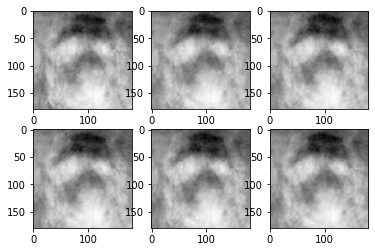

In [ ]:
# %% Fit all data for plots
pca = PCA(n_components=(len(A) - numSbj))
pca.fit(A)
pcatA = pca.transform(A)
lda.fit(pcatA, y)
ldatA = lda.transform(pcatA)
#Plot fisherfaces
plt.figure()
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    #Map from PCA space back to the original space (of images)
    C1 = pca.inverse_transform(lda.scalings_[:, i])
    C1.shape = [180, 180]
    ax.imshow(C1,cmap='Greys')
plt.show()

In [ ]:
# %% simplified LDA
kf = KFold(n_splits=4, random_state=1, shuffle=True)
kf.get_n_splits(A)

print(kf)

for train_index, test_index in kf.split(A):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = A[train_index], A[test_index]
  y_train, y_test = y[train_index], y[test_index]
  #Compute LDA of reduced data
  lda.fit(X_train, y_train)
  #Compute classification error
  outVal = lda.score(X_test, y_test)
  print('Score: ' + str(outVal*100))

KFold(n_splits=4, random_state=1, shuffle=True)
Score: 33.33333333333333
Score: 40.0
Score: 20.0
Score: 33.33333333333333
